<a href="https://colab.research.google.com/github/GabrielBrionesL/machine-learning-with-python-scikitlearn/blob/main/Predicting_Medical_Expenses_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Medical Expenses Using Linear Regression

## Problem Statement

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.


In [278]:
!pip install pandas-profiling --quiet  # Restart kernel after installation

In [279]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from urllib.request import urlretrieve

## Load Data

In [280]:
# Download the data using urlretrieve function from urllib.request

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [281]:
from urllib.request import urlretrieve

urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x78c58a42d000>)

We can now create a Pandas dataframe using the file to view and analyze the data

In [282]:
medical_df = pd.read_csv('medical.csv')

medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Quality

### Check for missing values

In [283]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Insights:**

- Numerical Values:
  - Age
  - Children
  - BMI (Body Mass Index)
  - Charges
- Strings:
  - Smoker
  - Region
  - Sex
- No Null Values

In [284]:
# Statistics for the numerical columns

medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Insights:

The range of values in the numerical columns seem reasonable. "charges" seems to be significantly skewed because the median (50 precentile) is much lower than the maximum value.

The age min and max may indicate an internal policy of ages accepted to write a policy.

## Exploratory Analysis and Visualization

### Age

We can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn

In [285]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [286]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',  # Creates a box plot above the historgram
                   nbins=47,  # One for each year
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform with 20-30 customers for each age. 18 and 19 seem to have over twice as many customers as other ages.

### Body Mass Index

We can visualize the distribution using a historgram and box plot

In [287]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',  # Creates a box plot above the historgram
                   color_discrete_sequence=['red'],  # Changes plot color to red
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Charges

Charges is the annual medical charges for customers. This is our target variables (column that we're trying to predict).

We will also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [288]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',  # Creates a box plot above the historgram
                   color='sex', # Split the histogram of charges for male v.s. female
                   color_discrete_sequence=['pink', 'light blue'],  # Changes plot color to light blue (male) and female (pink)
                   title='Annual Medical Charges by Sex')
fig.update_layout(bargap=0.1)
fig.show()

It appears evenly distributed between males and females. It appears that above USD 50,000 is an extreme outlier

In [289]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',  # Creates a box plot above the historgram
                   color='region', # Split the histogram of charges for southwest v.s. southeast v.s. northwest v.s. northeast
                   color_discrete_sequence=['red', 'white', 'blue', 'yellow'],  # Changes plot color to red (southwest), white (southeast), blue (northwest), yellow (norteast)
                   title='Annual Medical Charges by Region')
fig.update_layout(bargap=0.1)
fig.show()

It appears that above USD 50,000 is an extreme outlier

In [290]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',  # Creates a box plot above the historgram
                   color='smoker', # Split the histogram of charges for smoker v.s. non-smoker
                   color_discrete_sequence=['green', 'grey'],  # Changes plot color to green (yes) and grey (no)
                   title='Annual Medical Charges by Smokers')
fig.update_layout(bargap=0.1)
fig.show()

Insights:
- For most customers, the annual medical charges are under USD 10,000. Only a small fraction of customers have higher medical expenses, possibly due to accidents, major illnesses, and genetic diseases. The distribution follows a "power law"
- There is significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to USD 35,000

### Smoker

We can visualize the distribution of "smoker"

In [291]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [292]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It looks like 20% of customers have reported that they smoke. Does this match the national average (2020 Census)?

It also looks like smoking is more common among males. Can this be verified?

### Sex

In [293]:
medical_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [294]:
px.histogram(medical_df, x='sex', color='sex', title='Sex')

### Region

In [295]:
medical_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [296]:
px.histogram(medical_df, x='region', color='region', title='Region')

### Children

In [297]:
medical_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [298]:
px.histogram(medical_df, x='children', color='children', title='Children')

There are more customers without children than with children

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Each point in the scatter plot represents one customer.

In [299]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Insights:

- The general trend seems to be that medical charges increase with age, as we might expect. But there is sifnificant variation at every age and age alone cannot be used to accurately determine medical charges.

- We can see three "clusters" of points. Each cluster seems to form a line with an increasing slope:
  - The first and the largest cluster consists primarily of presumably "healthy non-smokers"
  - The second cluster contains a mix of smokers and non-smokers. It could be that there are actually two distinct but overlapping clusters like "non-smokers with medical issues" and "smokers without major medical issues".
  - The final cluster consists exclusively of smokers, perhaps with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges

In [300]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [301]:
px.violin(medical_df, x='children', y='charges')

In [302]:
px.violin(medical_df, x='sex', y='charges')

In [303]:
px.violin(medical_df, x='region', y='charges')

In [304]:
px.violin(medical_df, x='smoker', y='charges')

## Correlation

The values in some columns are more closely related to the values in "charges"compared to other columns e.g. "age" and "charges" seem to grow together, whereas "BMI" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient

In [305]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [306]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

To compute the correlation for categorical columns, they must first be converted into numeric columns

In [307]:
smoker_values = {'no':0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [308]:
medical_df.corr()

<ipython-input-308-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-309-3e83a659ca44>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

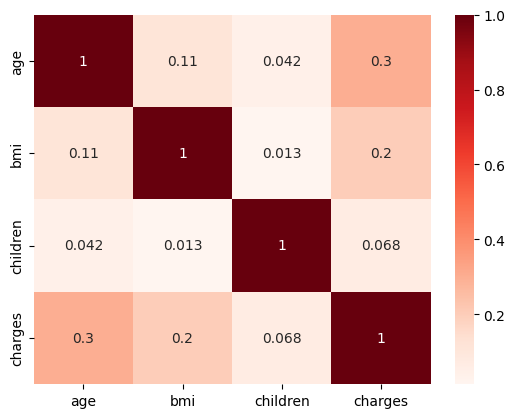

In [309]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)

## Linear Regression Using a Single Feature

We have now visualized that "smoker" and "age" columns have the strongest correlation with "charges". Let's try and estimate the values of "charges"using the value of "age" for non-smokers

In [310]:
# Create a dataframe containing just the data for non-smokers

non_smoker_df = medical_df[medical_df.smoker == 'no']

In [311]:
# Visualize the relationship between age and charges

fig = px.scatter(non_smoker_df,
                 x='age',
                 y='charges',
                 title='Age vs. Charges')
fig.show()

There are a few outliers but generally, the data seems to form a line. Let's try and fit a line.

### Model

The x axis shows "age" and the y axis shows "charges". Thus, we assume the following relationship:

*charges = w * age + b*

We will try and determine *w* and *b* for the line that best fits the data. The values in the age column of the dataset are called inputs to the model and the values in the charges column are called "targets".

We will define a helper function to compute charges, given age, w, and b.



In [312]:
def estimate_charges(age, w, b):
    return w * age + b

In [313]:
# Let's guess the values for w and b and use them to estimate the value for charges

w = 50
b = 100

estimate_charges(30, w, b)

1600

In [314]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [315]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

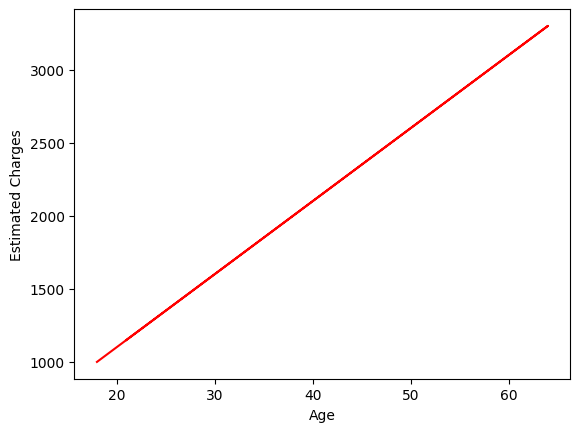

In [316]:
# Plot the estimated charges using a line graph

plt.plot(ages, estimated_charges, 'r');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

How well does our model fit the data?

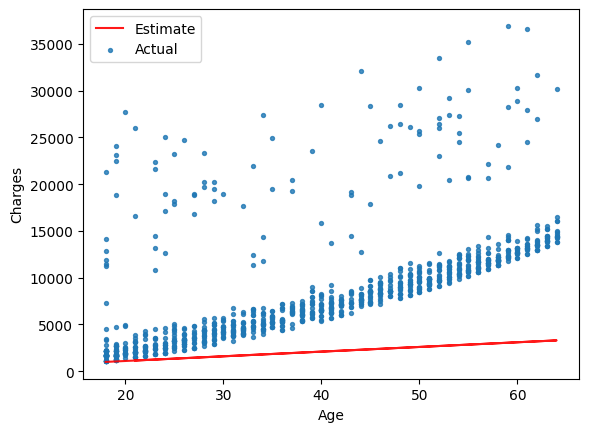

In [317]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Our estimates are poor and the line does not fit the data but we have a starting point. Now we can try different values of *w* and *b* to move the line around.

In [318]:
# Define helper function which takes w and b as inputs and creates the above plot
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

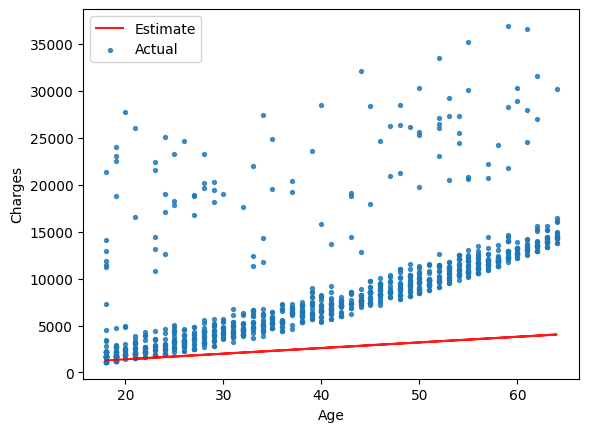

In [319]:
try_parameters(60,200)

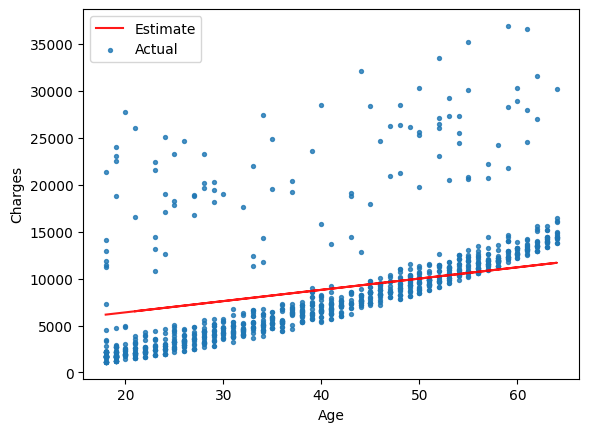

In [320]:
try_parameters(120,4000)

- We need to measure how well the line fits the points
- Once the measure of fit has been computed, we need to modify w and b to improve the fit

### RMSE

We can compare our model prediction with a single number known as the root mean squared error.

In [321]:
import numpy as np

In [322]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

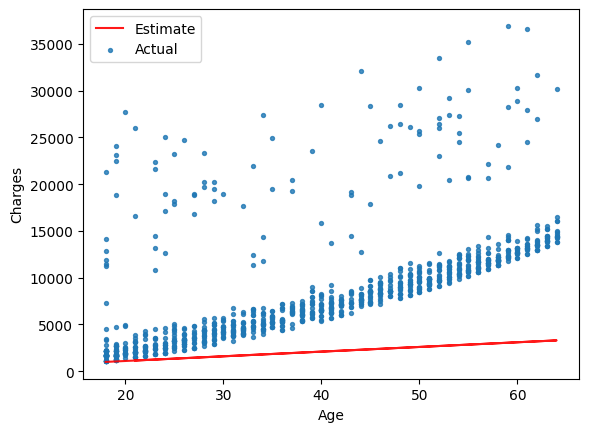

In [323]:
# Compute RMSE for model with a sample set of weights

w = 50
b = 100

try_parameters(w, b)

In [324]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [325]:
rmse(targets, predicted)

8461.949562575493

On average, each element in the prediction differs from the actual target by $8,461

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model


In [326]:
# Modify the function to display the loss

def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4991.993804156943


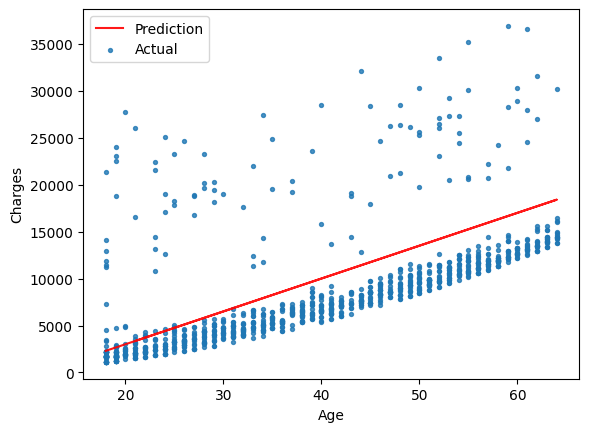

In [327]:
try_parameters(350,-4000)

### Optimizer

- Ordinary Least Squares (better for smaller data sets but can take up a lot of memory)
- Stochastic gradient descent (better for larger data sets)

Both of these have the same objective to minimize the loss.

Best option? Linear Regression using Scitkit-learn

## Linear Regression using Scikit-Learn

In [328]:
from sklearn.linear_model import LinearRegression

First, we create a new model object

In [329]:
model = LinearRegression()

Next, we can use the fit method of the model to find the best fit line for the inputs and targets

In [330]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



The input x should be a 2D array so we'll need to pass a dataframe instead of a single column

In [331]:
inputs = non_smoker_df[['age']]  # X parameter
targets = non_smoker_df.charges  # y parameter
print('inputs.shape:', inputs.shape)
print('targets.shape:', targets.shape)

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [332]:
# Fit the model to the data

model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model

In [333]:
# Sample prediction of the charges for the ages: 23, 37, 61

model.predict(np.array([[23],
                       [37],
                       [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

To understand if these values are reasonable, let's compare with the scatter plot

In [334]:
predictions = model.predict(inputs)

In [335]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

We can evaluate the model using RMSE loss

In [336]:
rmse(targets, predictions)

4662.505766636395

On average, it seems that our prediction is off by $4000. This feels acceptable considering that there are several outliers.

The parameters of the model are stored in the coef_ and intercept_ properties of the model

In [337]:
# w
model.coef_

array([267.24891283])

In [338]:
# b
model.intercept_

-2091.4205565650864

Let's visualize this using the function we built earlier:

RMSE Loss:  4662.505766636395


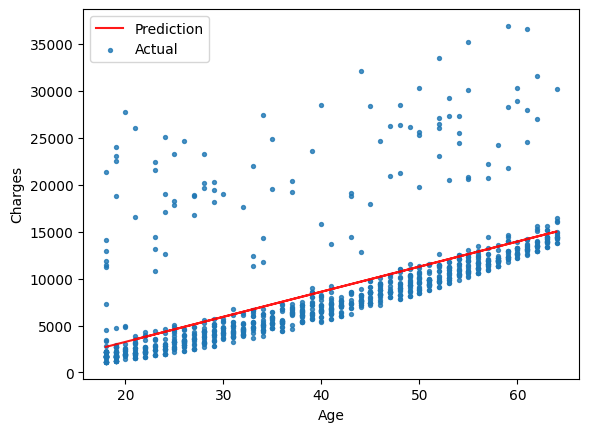

In [339]:
try_parameters(model.coef_, model.intercept_)

### Smokers

We will now train a linear regression model to estimate medical charges for smokers.

In [340]:
# Create a dataframe containing just the data for smokers

smoker_df = medical_df[medical_df.smoker == 'yes']

In [341]:
# Visualize the relationship between age and charges

fig = px.scatter(smoker_df,
                 x='age',
                 y='charges',
                 title='Age vs. Charges')
fig.show()

In [342]:
# Modify the function to display the loss

def try_parameters(w, b):
    ages = smoker_df.age
    target = smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [343]:
# Pass a dataframe instead of column

inputs_smoker = smoker_df[['age']]  # X parameter
targets_smoker = smoker_df.charges  # y parameter
print('inputs.shape:', inputs.shape)
print('targets.shape:', targets.shape)

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [344]:
# Fit the model to the data

model.fit(inputs_smoker, targets_smoker)

LinearRegression()

RMSE Loss:  10711.00334810241


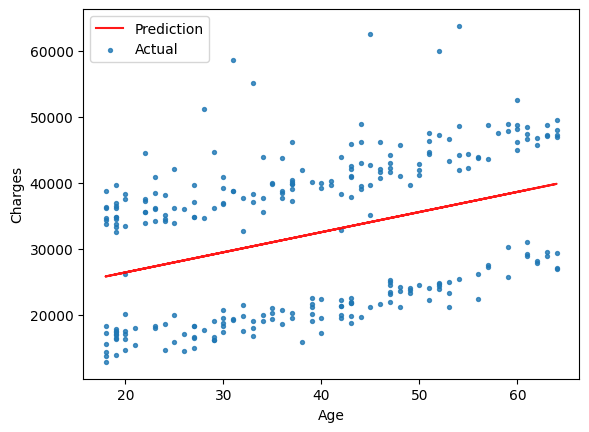

In [345]:
try_parameters(model.coef_, model.intercept_)

On average, it seems that our prediction is off by $10711. This fits the data that appears to be in two separate clusters from the visualization above.

## Linear Regression using Multiple Features

*charges = w1 * age + w2 * bmi + b*

In [346]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


BMI doesn't reduce RMSE by much. This is because BMI has a very weak correlation with charges, especially for non-smokers

In [347]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

You can't find a relationship that doesn't exist, no matter what machine learning technique or optimiation algorithim you apply

## Binary Categories

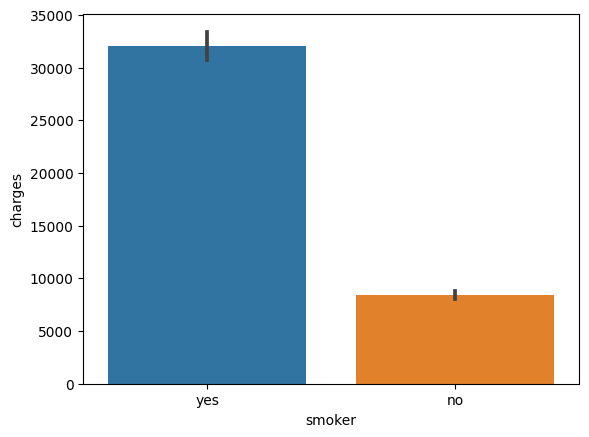

In [348]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [349]:
# Create new column to convert smoker to 0 for no and 1 for yes

smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [350]:
# Identify the correlation of smoker status
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [351]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We will include smoker_code to evaluate model

In [352]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss reduces from `11355` to `6056` (11355 from age, bmi, children inputs) which almost by 50%! This is an important lesson: never ignore categorical data.

What about sex?

<Axes: xlabel='sex', ylabel='charges'>

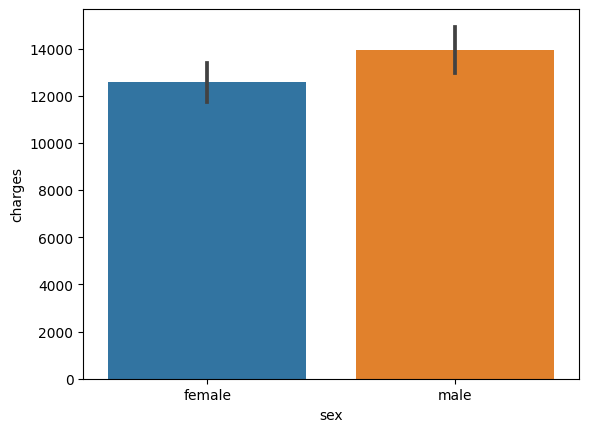

In [353]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [354]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [355]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [356]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


Sex does not have a significant impact on loss

## One-hot Encoding

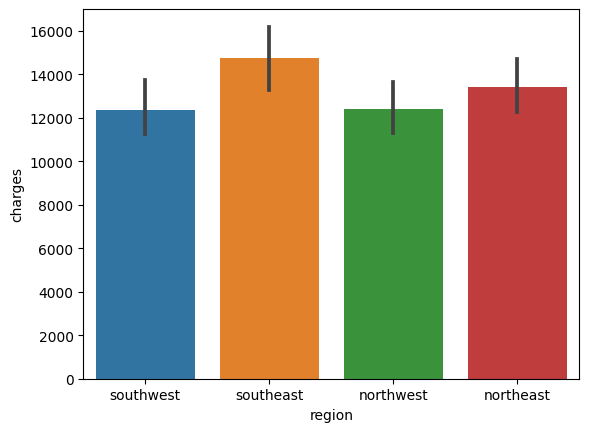

In [357]:
sns.barplot(data=medical_df, x='region', y='charges');

In [358]:
# Apply One Hot Encoding to the regions
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [359]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [360]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [361]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


We can use the smoker_code column for linear regression

$charges=w1​×age+w2​×bmi+w3​×children+w4​×smoker+w5​×sex+w6​×northeast+w7×northwest+w8×southeast+w9×southwest+b$

In [362]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


This leads a really small reduction in the loss

## Model Improvements

### Feature Scaling

To compare the importance of each feature in the model, our first instinct might be to compare their weights

In [363]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [364]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

In [365]:
# Apply StandardScalar

from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [366]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [367]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [368]:
# Visualize the scaled data

scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [369]:
# Merge with categroical data

cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


We can now compare the weights in our logistic regression

In [370]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


The important featuers are:
- Smoker
- Age
- BMI

In [374]:
new_customer = [[28,30,2,1,0,0,1,0,0.]]

In [375]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [376]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1,0,0,1,0,0.]])

array([29567.24252908])

## Model Validation (Test Set)

In [371]:
from sklearn.model_selection import train_test_split

In [372]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6123.590870786917


How does this compare to the training loss?

In [373]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6035.198772362892
